In [ ]:
# do this in your bash terminal (without the "!")
!pip install python-mnist

In [40]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,8)

In [41]:
# decompress the data
import gzip
filenames = 'train-images-idx3-ubyte t10k-images-idx3-ubyte train-labels-idx1-ubyte t10k-labels-idx1-ubyte'.split()

for i, filename in enumerate(filenames):
    pathin = '../shared-resources/mnist/' + filename + '.gz'
    pathout = pathin[:-3]
    with gzip.open(pathin) as fin:
        print("Reading file #{}: {}".format(i, pathin))
        with open('../shared-resources/mnist/' + filename, 'wb') as fout:
            print("Writing file #{}: {}".format(i, pathout))
            fout.write(fin.read())

Reading file #0: ../shared-resources/mnist/train-images-idx3-ubyte.gz
Writing file #0: ../shared-resources/mnist/train-images-idx3-ubyte
Reading file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte.gz
Writing file #1: ../shared-resources/mnist/t10k-images-idx3-ubyte
Reading file #2: ../shared-resources/mnist/train-labels-idx1-ubyte.gz
Writing file #2: ../shared-resources/mnist/train-labels-idx1-ubyte
Reading file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte.gz
Writing file #3: ../shared-resources/mnist/t10k-labels-idx1-ubyte


In [42]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [43]:
from mnist import MNIST

mnistdb = MNIST('../shared-resources/mnist/')

training_images, training_labels = mnistdb.load_training()
test_images, test_labels = mnistdb.load_testing()

In [44]:
df_train = pd.DataFrame(list(zip(training_images, training_labels)), columns=['image', 'label'])
df_test = pd.DataFrame(list(zip(test_images, test_labels)), columns=['image', 'label'])

In [45]:
df_train.head(5)

,image,label
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",4
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",9


In [46]:
print(df_train.label[0])
print(mnistdb.display(img=df_train.image[0]))

5

............................
............................
............................
............................
............................
.....................@@.....
.............@@@@@@.@@......
........@@@@@@@@@@..........
........@@@@@@..@@..........
...........@@@..............
............@...............
............@...............
.............@..............
.............@@.............
..............@@@...........
................@@..........
.................@@.........
.................@@@........
.................@@@........
..............@@@@@.........
............@@@@@@..........
..........@@@@@.............
........@@@@@...............
......@@@@@@................
.....@@@@...................
............................
............................
............................


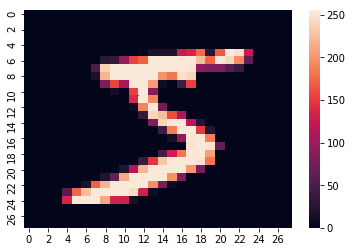

In [49]:
ax = sns.heatmap(pd.np.array(df_train.image[0]).reshape(28, 28))

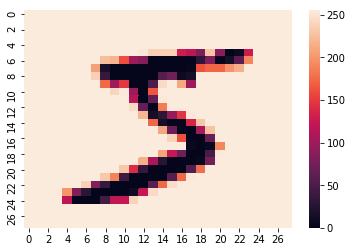

In [18]:
print(df_train.label[0])
ax = sns.heatmap(255 - pd.np.array(df_train.image[0]).reshape(28, 28))


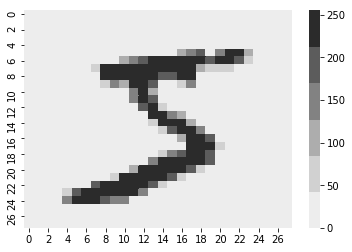

In [22]:
cmap = sns.palettes.color_palette('Greys')
ax = sns.heatmap(pd.np.array(df_train.image[0]).reshape(28, 28), cmap=cmap)

In [28]:
df_train_image = pd.DataFrame(list(df_train.image.values))
df_train_image.head(5)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10).fit(df_train_image)
df_pca10 = pca.transform(df_train_image)

In [34]:
df_pca10 = pd.DataFrame(df_pca10, columns=list('ABCDEFGHIJ'))
df_pca10.head()

,A,B,C,D,E,F,G,H,I,J
0,123.932596,-312.674232,-24.513834,-555.758128,-27.297691,-232.472581,233.997650,159.777856,-363.794322,198.549189
1,1011.718384,-294.856957,596.339715,-460.766827,-827.276138,-181.945237,-45.003322,-104.925673,39.887610,151.057952
2,-51.849601,392.173160,-188.509753,521.011451,-306.680503,-1.833667,-859.029410,368.596121,-114.673025,-178.545231
3,-799.127040,-607.197319,273.651020,105.878747,-1.851758,699.648032,-473.726857,-67.359180,303.389306,11.144596
4,-382.754935,730.542866,16.353722,-241.697343,98.161597,43.230990,-91.645202,-405.546045,225.335914,104.108515


In [37]:
df_pca10.corr()

,A,B,C,D,E,F,G,H,I,J
A,1.000000e+00,5.414858e-14,1.340724e-13,-1.725785e-13,-6.027948e-13,3.085814e-12,9.265931e-12,3.646514e-12,-1.739702e-10,1.294802e-11
B,5.414858e-14,1.000000e+00,2.276452e-12,-4.829664e-12,-1.353450e-11,5.224806e-11,1.041838e-10,2.187861e-10,-3.313831e-09,-4.894495e-11
C,1.340724e-13,2.276452e-12,1.000000e+00,-9.377572e-12,-2.785573e-11,1.044771e-10,1.633759e-10,3.350110e-10,-6.237987e-09,2.144692e-10
D,-1.725785e-13,-4.829664e-12,-9.377572e-12,1.000000e+00,5.510009e-11,-2.025646e-10,-2.627270e-10,-9.667283e-10,1.321968e-08,-5.429593e-10
E,-6.027948e-13,-1.353450e-11,-2.785573e-11,5.510009e-11,1.000000e+00,-5.871502e-10,-9.614816e-10,-2.150356e-09,3.625939e-08,-3.902182e-10
F,3.085814e-12,5.224806e-11,1.044771e-10,-2.025646e-10,-5.871502e-10,1.000000e+00,4.578638e-09,8.632031e-09,-1.430524e-07,3.061627e-10
G,9.265931e-12,1.041838e-10,1.633759e-10,-2.627270e-10,-9.614816e-10,4.578638e-09,1.000000e+00,1.730403e-08,-2.864413e-07,-1.876484e-08
H,3.646514e-12,2.187861e-10,3.350110e-10,-9.667283e-10,-2.150356e-09,8.632031e-09,1.730403e-08,1.000000e+00,-5.857227e-07,-9.779641e-09
I,-1.739702e-10,-3.313831e-09,-6.237987e-09,1.321968e-08,3.625939e-08,-1.430524e-07,-2.864413e-07,-5.857227e-07,1.000000e+00,1.316423e-08
J,1.294802e-11,-4.894495e-11,2.144692e-10,-5.429593e-10,-3.902182e-10,3.061627e-10,-1.876484e-08,-9.779641e-09,1.316423e-08,1.000000e+00


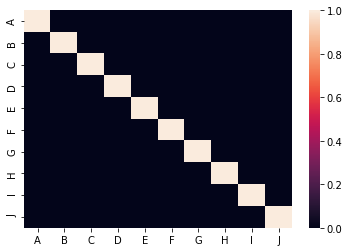

In [36]:
ax = sns.heatmap(df_pca10.corr())

/home/hobs/.virtualenvs/civicu/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7afef42630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7afd202278>]], dtype=object)

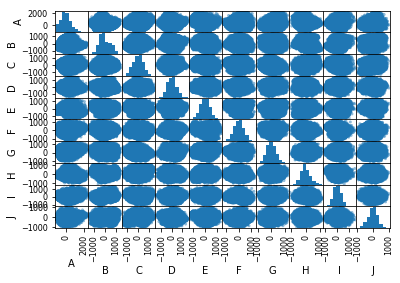

In [38]:
ax = pd.plotting.scatter_matrix(df_pca10)

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(df_pca10)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
df_pca10['cluster_id'] = kmeans.predict(df_pca10.values[:,:10])
df_pca10['digit_id'] = df_train.label
df_pca10.head()


,A,B,C,D,E,F,G,H,I,J,cluster_id,digit_id
0,123.932596,-312.674232,-24.513834,-555.758128,-27.297691,-232.472581,233.997650,159.777856,-363.794322,198.549189,3,5
1,1011.718384,-294.856957,596.339715,-460.766827,-827.276138,-181.945237,-45.003322,-104.925673,39.887610,151.057952,4,0
2,-51.849601,392.173160,-188.509753,521.011451,-306.680503,-1.833667,-859.029410,368.596121,-114.673025,-178.545231,7,4
3,-799.127040,-607.197319,273.651020,105.878747,-1.851758,699.648032,-473.726857,-67.359180,303.389306,11.144596,8,1
4,-382.754935,730.542866,16.353722,-241.697343,98.161597,43.230990,-91.645202,-405.546045,225.335914,104.108515,6,9


In [56]:
pca2 = PCA(n_components=2).fit(df_train_image)
df_pca2 = pca2.transform(df_train_image)
df_pca2 = pd.DataFrame(df_pca2, columns=list('xy'))
df_pca2['cluster_id'] = kmeans.predict(df_pca10.values[:,:10])
df_pca2['digit_id'] = df_train.label
df_pca2.head()


,x,y,cluster_id,digit_id
0,123.932295,-312.676901,3,5
1,1011.718602,-294.859037,4,0
2,-51.849569,392.173135,7,4
3,-799.127079,-607.195344,8,1
4,-382.754814,730.541981,6,9


NameError: name 'plt' is not defined

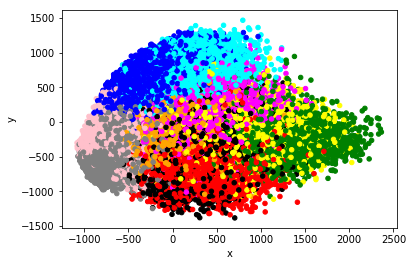

In [57]:
colors = pd.np.array('magenta  red pink orange yellow green blue cyan gray black'.split())[df_pca2.cluster_id] 
df_pca2.plot.scatter(x='x', y='y', c=colors)


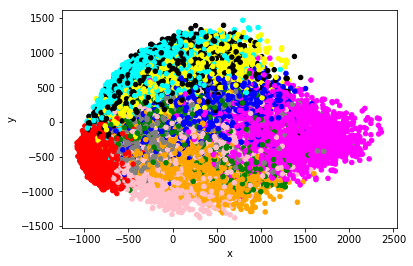

In [58]:
colors = pd.np.array('magenta  red pink orange yellow green blue cyan gray black'.split())[df_pca2.digit_id] 
df_pca2.plot.scatter(x='x', y='y', c=colors)

In [64]:
digit2cluster = []
for digit in range(10):
    votes = df_pca2.cluster_id[df_pca2.digit_id == digit].value_counts()
    print()
    print(votes)
    print()
    i = 0
    cluster_id = votes.index[i]
    while cluster_id in digit2cluster:
        cluster_id = votes.index[i]
        i += 1
    digit2cluster.append(cluster_id)



5    3111
4    2235
1     177
0     169
3     117
7      44
2      26
9      18
8      18
6       8
Name: cluster_id, dtype: int64


2    3625
8    3080
3       9
6       7
9       7
0       7
7       4
1       3
Name: cluster_id, dtype: int64


9    4090
2     525
1     315
8     251
0     230
7     182
3     147
4     136
6      58
5      24
Name: cluster_id, dtype: int64


1    3829
3     994
2     568
9     194
7     181
4     170
8     110
6      35
0      35
5      15
Name: cluster_id, dtype: int64


7    3188
6    1772
8     321
2     263
0     222
9      35
4      15
3      14
5      12
Name: cluster_id, dtype: int64


1    1640
3    1215
8     807
4     510
2     441
7     401
6     249
5      74
0      73
9      11
Name: cluster_id, dtype: int64


0    4573
2     547
9     203
8     189
4     163
7      91
5      67
3      52
1      32
6       1
Name: cluster_id, dtype: int64


6    3582
7    1818
2     530
8     242
9      42
5      18
4      14
3      11
1       4
0       

In [67]:
digit2cluster

[5, 2, 9, 1, 7, 3, 0, 6, 8, 4]

In [68]:
df_pca2['predicted_digit'] = [digit2cluster.index(cid) for cid in df_pca2.cluster_id]

In [70]:
accuracy = (df_pca2.predicted_digit == df_pca2.digit_id).sum() / len(df_pca2)
accuracy

0.46305000000000002